영가설/대립가설: 두변수 간 상관관계 존재 하지 않는다/존재한다

In [1]:
import os
import pandas as pd

os.chdir(r"C:\Users\user\jupyter\python\preprocessing\Part2. 탐색적 데이터 분석\데이터")


In [3]:
df = pd.read_excel("일별_금은달러.xlsx")

In [21]:
df1 =  df.sort_values(by = '일자').reset_index(drop = True)
df1

,일자,금값,은값,달러 환율
0,2020.06.30,68559.78,18.54,1203.0
1,2020.07.01,68941.28,18.13,1203.5
2,2020.07.02,68278.07,18.24,1199.0
3,2020.07.06,68269.27,18.50,1194.0
4,2020.07.07,68443.14,18.63,1197.0
5,2020.07.08,69184.17,19.08,1195.0
6,2020.07.09,69748.21,18.88,1195.0
7,2020.07.10,69735.18,18.98,1201.0
8,2020.07.13,69933.64,19.71,1203.0
9,2020.07.14,69827.02,19.45,1206.5


In [79]:
df.sort_values(by = '일자', inplace = True)

In [6]:
# 그래프 기본 설정
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 8)

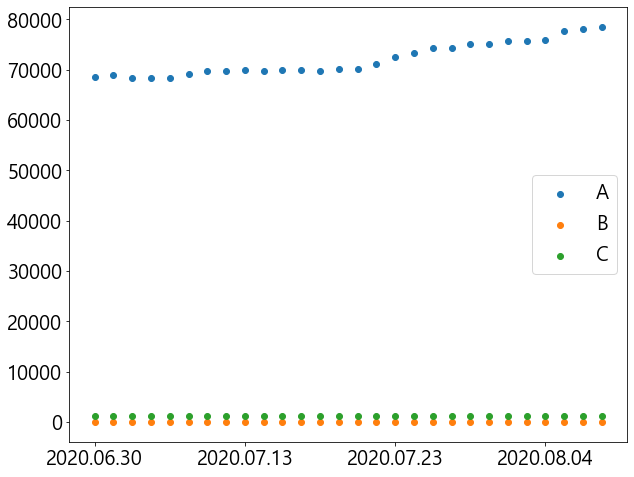

In [22]:
plt.scatter(df1['일자'], df1['금값'], label = 'A')
plt.scatter(df1['일자'], df1['은값'], label = 'B')
plt.scatter(df1['일자'], df1['달러 환율'], label = 'C')
plt.xticks(df1['일자'].iloc[::8])
plt.legend()

([<matplotlib.axis.XTick at 0x23827c21460>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

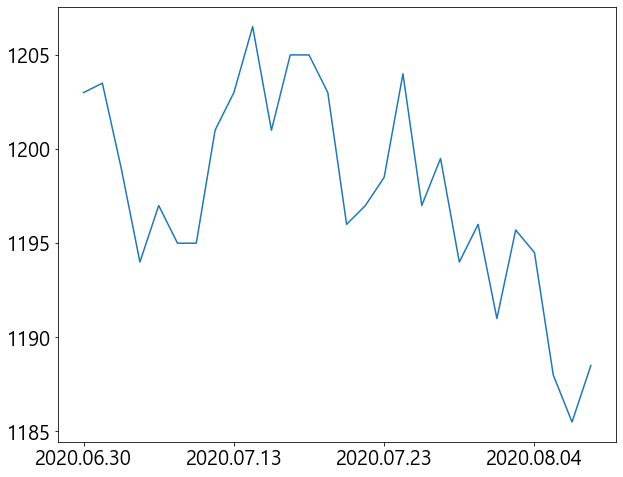

In [18]:
plt.plot(df1['일자'], df1['달러 환율'], label = 'C')
plt.xticks(df1['일자'].iloc[::8])
# 환율이 곤두박질 쳤죠? 스펄??

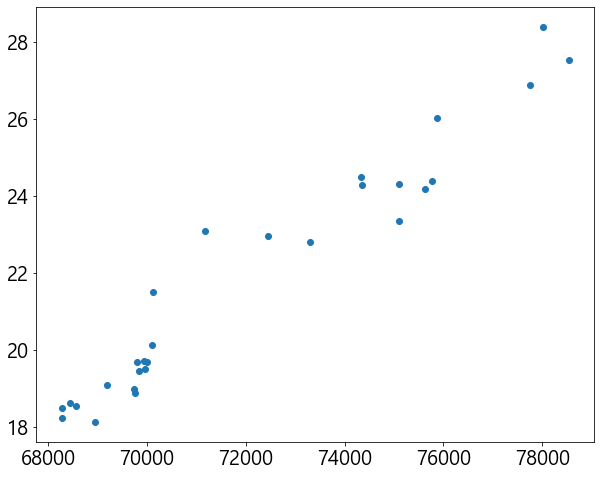

In [23]:
plt.scatter(df1['금값'], df1['은값'])

array([[<AxesSubplot:xlabel='금값', ylabel='금값'>,
        <AxesSubplot:xlabel='은값', ylabel='금값'>,
        <AxesSubplot:xlabel='달러 환율', ylabel='금값'>],
       [<AxesSubplot:xlabel='금값', ylabel='은값'>,
        <AxesSubplot:xlabel='은값', ylabel='은값'>,
        <AxesSubplot:xlabel='달러 환율', ylabel='은값'>],
       [<AxesSubplot:xlabel='금값', ylabel='달러 환율'>,
        <AxesSubplot:xlabel='은값', ylabel='달러 환율'>,
        <AxesSubplot:xlabel='달러 환율', ylabel='달러 환율'>]], dtype=object)

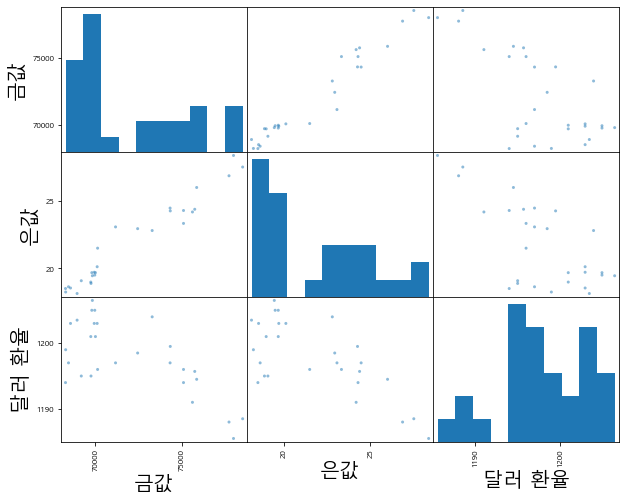

In [24]:
pd.plotting.scatter_matrix(df.drop('일자', axis = 1))

In [25]:
from scipy.stats import *
print(pearsonr(df['금값'], df['은값']))
print(pearsonr(df['금값'], df['달러 환율']))
print(pearsonr(df['은값'], df['달러 환율']))

(0.9718640116033495, 7.5088783565577e-18)
(-0.6793266264341937, 7.033325258452259e-05)
(-0.6954569556203559, 3.989042061957972e-05)


In [26]:
import itertools
target_columns = ['금값', '은값', '달러 환율']
for col1, col2 in itertools.combinations(target_columns, 2):
    result = pearsonr(df[col1], df[col2])
    print("{} ~ {}: coef:{}, p-value: {}".format(col1, col2, result[0], result[1]))

금값 ~ 은값: coef:0.9718640116033495, p-value: 7.5088783565577e-18
금값 ~ 달러 환율: coef:-0.6793266264341937, p-value: 7.033325258452259e-05
은값 ~ 달러 환율: coef:-0.6954569556203559, p-value: 3.989042061957972e-05


In [27]:
import itertools
target_columns = ['금값', '은값', '달러 환율']
for col1, col2 in itertools.combinations(target_columns, 2):
    result = spearmanr(df[col1], df[col2])
    print("{} ~ {}: coef:{}, p-value: {}".format(col1, col2, result[0], result[1]))

금값 ~ 은값: coef:0.9711235892228813, p-value: 1.0481280432981455e-17
금값 ~ 달러 환율: coef:-0.5039075855936102, p-value: 0.006257468267109453
은값 ~ 달러 환율: coef:-0.528106006718531, p-value: 0.003869997604824081


In [28]:
df.drop('일자', axis = 1).corr(method = 'pearson')

,금값,은값,달러 환율
금값,1.000000,0.971864,-0.679327
은값,0.971864,1.000000,-0.695457
달러 환율,-0.679327,-0.695457,1.000000


In [29]:
df.drop('일자', axis = 1).corr(method = 'spearman')

,금값,은값,달러 환율
금값,1.000000,0.971124,-0.503908
은값,0.971124,1.000000,-0.528106
달러 환율,-0.503908,-0.528106,1.000000
